In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-5.84159588,  5.32012556],
       [-0.33236198, -3.04840866],
       [ 5.20833253,  8.06160567],
       ...,
       [ 3.81213761,  5.43140535],
       [ 3.27619721,  7.2599016 ],
       [-0.65606069, -4.05871423]])

In [4]:
y

array([1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2,
       0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2, 1,
       1, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1,
       0, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 0, 2, 2, 0,
       0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2,
       0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0,
       0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0,

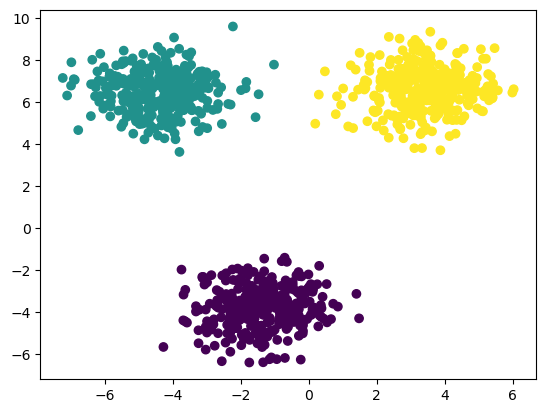

In [28]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [29]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)


In [12]:
wcss

[1339.9999999999995,
 650.9470302758376,
 86.83841465057955,
 74.8470951321724,
 59.4806730730005,
 47.48655311782247,
 44.300721870177874,
 39.695174739653545,
 37.073272944213684,
 32.62298922364291]

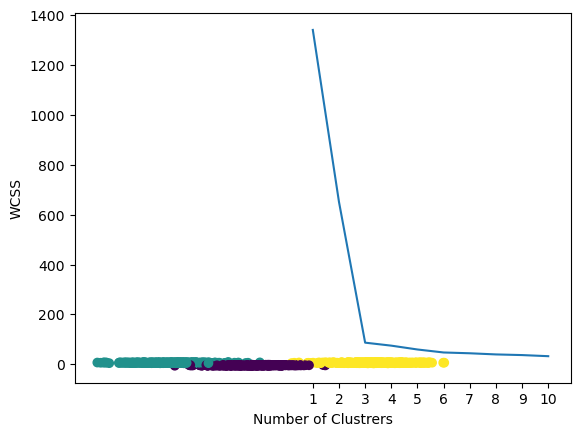

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1, 1, 2,
       1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2,
       1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2,
       0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1,
       1, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0,
       2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1,
       2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 2,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0,
       1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 0,
       2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1,
       0, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 2,
       1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0,
       1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0,
       1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0,
       2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0,
       2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0,
       2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1,

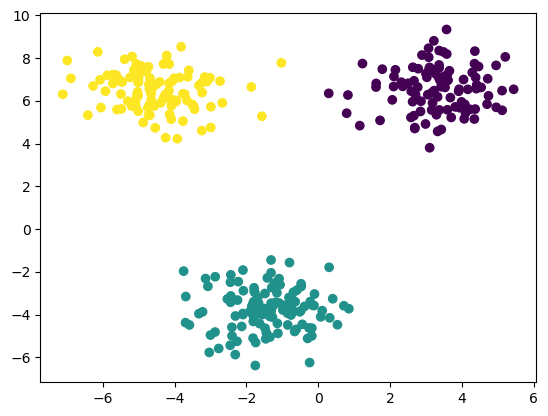

In [31]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.show()

In [19]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [20]:
## kneelocator
!pip install kneed

In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [23]:
kl.elbow

3

In [24]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [25]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [26]:
silhouette_coefficients

[0.5594319602714906,
 0.7977832290346928,
 0.6613010183008531,
 0.5300927725839075,
 0.39380225115278905,
 0.5047803243820307,
 0.3521386561788148,
 0.3627452224723684,
 0.3238841090661369]

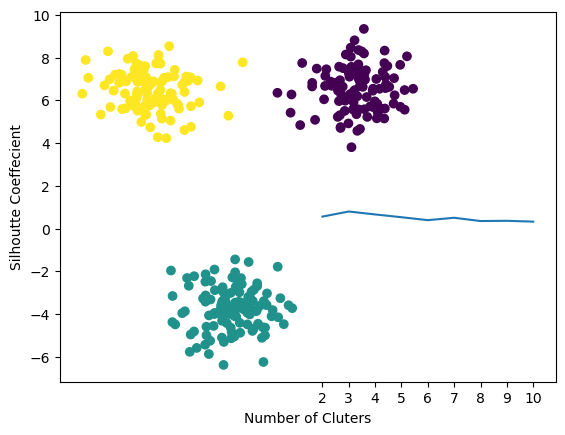

In [27]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()